In [1]:
import numpy as np
import scipy as sp
import os
from scipy import io,integrate,sparse
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from lanczos_bin import *

from IPython.display import clear_output
%load_ext autoreload
%autoreload 2

In [2]:
os.makedirs("data/fp", exist_ok=True)

In [3]:
plt.rcParams['text.latex.preamble'] = r'\renewcommand{\vec}{\mathbf}'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [4]:
problems = [{'name':'California',
             'Ks':np.unique(np.logspace(1,np.log10(1200),15,dtype='int')),
             'n_samples':6,
            },
            {'name':'Erdos992',
             'Ks':np.unique(np.logspace(1,np.log10(800),15,dtype='int')),
             'n_samples':9,
            },
            {'name':'MNIST_cov',
             'Ks':np.unique(np.logspace(1,np.log10(500),15,dtype='int')),
             'n_samples':68
            },
            {'name':'uniform',
             'Ks':np.unique(np.logspace(1,np.log10(200),15,dtype='int')),
             'n_samples':11
            },]

In [5]:
# generate data
if True:
    for problem in problems:

        name = problem['name']
        n_samples = problem['n_samples']
        Ks = problem['Ks']

        lam = np.load(f"matrices/{name}_eigs.npy")
        
        print(name)
        np.save(f'data/fp/{name}_GQs',get_GQs(lam,n_samples,Ks,reorth=False),allow_pickle=True)

California
Erdos992
MNIST_cov
uniform


In [6]:
# generate bounds
if True:
    for problem in problems:

        name = problem['name']
        lam = np.load(f"matrices/{name}_eigs.npy")

        GQs,vs = np.load(f'data/fp/{name}_GQs.npy',allow_pickle=True)

        print(name)
        np.save(f'data/fp/{name}',W_experiment(GQs,lam,vs,np.min(lam),np.max(lam)),allow_pickle=True)

California
Erdos992
MNIST_cov
uniform


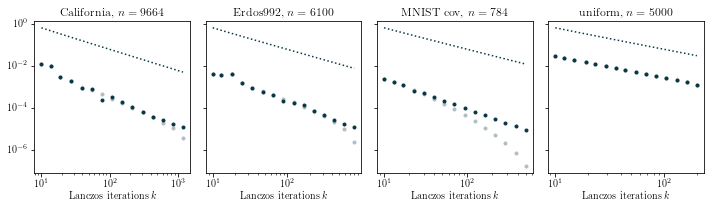

In [7]:
fig,axs = plt.subplots(1,len(problems),figsize=(12,2.8),sharey='row')
fig.subplots_adjust(wspace=.1)

for i,problem in enumerate(problems):
    
    name = problem['name']
    
    lam = np.load(f"matrices/{problem['name']}_eigs.npy")
    n = len(lam)
    A = sp.sparse.spdiags(lam,0,n,n)
    
    lb = np.min(lam)
    ub = np.max(lam)
    
    # plot spectrum
    axs[i].set_title(f"{name.replace('_',' ')}, $n={n}$")#, $n_v={n_samples}$")

    # load data
#    Ks,n_samples,t_KS,t_KS_bd,t_W,t_W_bd,GQ_ave = np.load(f'data/wass/{name}.npy',allow_pickle=True)

    
    # plot GQ
    n_samples,Ks,t_W,_ = np.load(f'data/wass/{name}.npy',allow_pickle=True)
    axs[i].plot(Ks,t_W/(np.max(lam)-np.min(lam)),linestyle='None',marker='.',color='#afbec4')
    
    # load data
    n_samples,Ks,t_W,_ = np.load(f'data/fp/{name}.npy',allow_pickle=True)
    axs[i].plot(Ks,t_W/(np.max(lam)-np.min(lam)),linestyle='None',marker='.',color='#073642')

    # plot ub
    axs[i].plot(Ks,12/(2*Ks-1),linestyle=':',color='#073642')

    axs[i].set_xscale('log')
    axs[i].set_yscale('log')

    axs[i].set_xlabel(f'Lanczos iterations $k$')

plt.savefig('imgs/tW_bounds_fp.pdf',bbox_inches='tight')